<h2>Importing data and libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
bcd=pd.read_csv('breast-cancer-wisconsindata.csv',names=['Sample code number','Clump Thickness'
                                                                                       ,'Uniformity of Cell Size','Uniformity of Cell Shape',
                                                                                       'Marginal Adhesion','Single Epithelial Cell Size'
                                                                                       ,'Bare Nuclei','Bland Chromatin','Normal Nucleoli'
                                                                                       ,'Mitoses','Class:'])

<h2>Exploring data</h2>

In [3]:
bcd

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
bcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class:                       699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
bcd.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<h2>Removing duplicates</h2>

In [6]:
bcd[bcd.duplicated(subset='Sample code number',keep=False)].sort_values(by='Sample code number')


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
267,320675,3,3,5,2,3,10,7,1,1,4
272,320675,3,3,5,2,3,10,7,1,1,4
575,385103,5,1,2,1,2,1,3,1,1,2
269,385103,1,1,1,1,2,1,3,1,1,2
271,411453,5,1,1,1,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
561,1321942,5,1,1,1,2,1,3,1,1,2
660,1339781,1,1,1,1,2,1,2,1,1,2
661,1339781,4,1,1,1,2,1,3,1,1,2
672,1354840,2,1,1,1,2,1,3,1,1,2


In [7]:
bcd.drop_duplicates(inplace=True)

In [8]:
bcd

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


<h2>Cleaning Data</h2>

In [9]:
bcd['Bare Nuclei'] = pd.to_numeric(bcd['Bare Nuclei'], errors='coerce')


In [10]:
bcd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           691 non-null    int64  
 1   Clump Thickness              691 non-null    int64  
 2   Uniformity of Cell Size      691 non-null    int64  
 3   Uniformity of Cell Shape     691 non-null    int64  
 4   Marginal Adhesion            691 non-null    int64  
 5   Single Epithelial Cell Size  691 non-null    int64  
 6   Bare Nuclei                  675 non-null    float64
 7   Bland Chromatin              691 non-null    int64  
 8   Normal Nucleoli              691 non-null    int64  
 9   Mitoses                      691 non-null    int64  
 10  Class:                       691 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.8 KB


In [11]:
bcd['Bare Nuclei'].value_counts()

1.0     397
10.0    130
2.0      30
5.0      30
3.0      28
8.0      20
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare Nuclei, dtype: int64

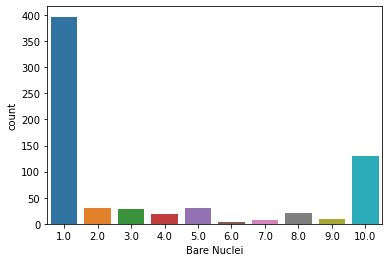

In [12]:
sns.countplot(x='Bare Nuclei',data=bcd)
plt.show()

In [13]:
bcd['Bare Nuclei'].replace(np.nan,1.0,inplace=True)
bcd['Bare Nuclei'] = bcd['Bare Nuclei'].astype(int)

In [14]:
bcd['Bare Nuclei'].value_counts()

1     413
10    130
2      30
5      30
3      28
8      20
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

<h2>Preparing and splitting data for model</h2>

In [15]:
data=bcd.loc[:,'Clump Thickness':'Mitoses']

In [16]:
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [17]:
target=bcd['Class:']
target

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class:, Length: 691, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3) 


<h2>Generating model and getting final evaluation for accuracy</h2>

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9759615384615384
